# Construct an object detector using Convolutional Neural Networks

In [2]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
import cv2
print(cv2.__version__)

4.10.0


In [4]:
path = "C://Users//admin//DataSet RCNN//DataSet RCNN//Images//Images"
annot = "C://Users//admin//DataSet RCNN//DataSet RCNN//Airplanes_Annotations//Airplanes_Annotations"

airplane_001.jpg


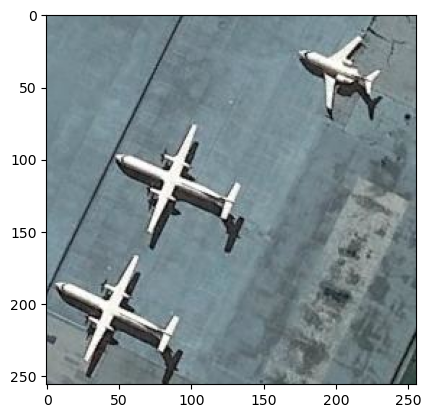

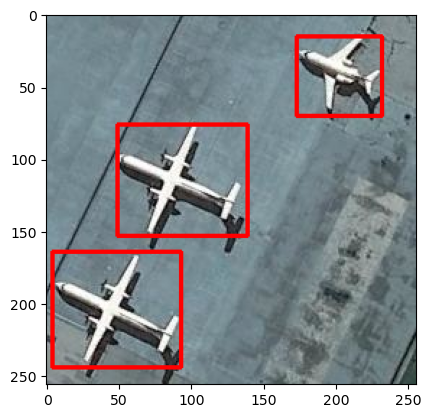

In [5]:
for e,i in enumerate(os.listdir(annot)):
    if e < 10:
        filename = i.split(".")[0]+".jpg"
        print(filename)
        img = cv2.imread(os.path.join(path,filename))
        df = pd.read_csv(os.path.join(annot,i))
        plt.imshow(img)
        for row in df.iterrows():
            x1 = int(row[1][0].split(" ")[0])
            y1 = int(row[1][0].split(" ")[1])
            x2 = int(row[1][0].split(" ")[2])
            y2 = int(row[1][0].split(" ")[3])
            cv2.rectangle(img,(x1,y1),(x2,y2),(255,0,0), 2)
        plt.figure()
        plt.imshow(img)
        break

In [ ]:
#!pip uninstall opencv-contrib-python opencv-python

In [18]:
#!pip install opencv-contrib-python --user

  Obtaining dependency information for opencv-contrib-python from https://files.pythonhosted.org/packages/a7/9e/7110d2c5d543ab03b9581dbb1f8e2429863e44e0c9b4960b766f230c1279/opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_contrib_python-4.10.0.84-cp37-abi3-win_amd64.whl (45.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\cv2\\cv2.pyd'
Check the permissions.



In [1]:
from cv2.ximgproc import segmentation
#from cv2.ximgproc.segmentation import createSelectiveSearchSegmentation


In [6]:
import cv2
import cv2.ximgproc.segmentation

print(dir(cv2.ximgproc.segmentation))

['GraphSegmentation', 'SelectiveSearchSegmentation', 'SelectiveSearchSegmentationStrategy', 'SelectiveSearchSegmentationStrategyColor', 'SelectiveSearchSegmentationStrategyFill', 'SelectiveSearchSegmentationStrategyMultiple', 'SelectiveSearchSegmentationStrategySize', 'SelectiveSearchSegmentationStrategyTexture', '__doc__', '__loader__', '__name__', '__package__', '__spec__', 'createGraphSegmentation', 'createSelectiveSearchSegmentation', 'createSelectiveSearchSegmentationStrategyColor', 'createSelectiveSearchSegmentationStrategyFill', 'createSelectiveSearchSegmentationStrategyMultiple', 'createSelectiveSearchSegmentationStrategySize', 'createSelectiveSearchSegmentationStrategyTexture']


In [7]:
from cv2.ximgproc.segmentation import createSelectiveSearchSegmentation

In [9]:
cv2.setUseOptimized(True);
#ss = segmentation.createSelectiveSearchSegmentation()
ss = createSelectiveSearchSegmentation()


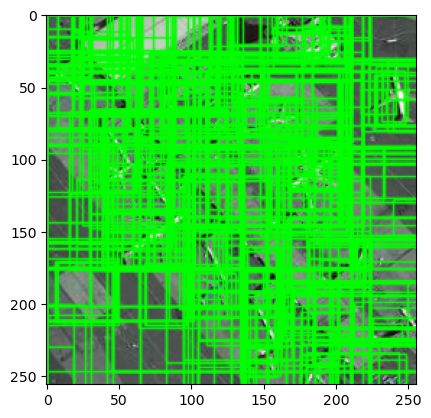

In [10]:
im = cv2.imread(os.path.join(path,"airplane_687.jpg"))
ss.setBaseImage(im)
ss.switchToSelectiveSearchFast()
rects = ss.process()
imOut = im.copy()
for i, rect in (enumerate(rects)):
    x, y, w, h = rect
#     print(x,y,w,h)
#     imOut = imOut[x:x+w,y:y+h]
    cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
# plt.figure()
plt.imshow(imOut)

In [11]:
train_images=[]
train_labels=[]

In [12]:
def get_iou(bb1, bb2):
    assert bb1['x1'] < bb1['x2']
    assert bb1['y1'] < bb1['y2']
    assert bb2['x1'] < bb2['x2']
    assert bb2['y1'] < bb2['y2']

    x_left = max(bb1['x1'], bb2['x1'])
    y_top = max(bb1['y1'], bb2['y1'])
    x_right = min(bb1['x2'], bb2['x2'])
    y_bottom = min(bb1['y2'], bb2['y2'])

    if x_right < x_left or y_bottom < y_top:
        return 0.0

    intersection_area = (x_right - x_left) * (y_bottom - y_top)

    bb1_area = (bb1['x2'] - bb1['x1']) * (bb1['y2'] - bb1['y1'])
    bb2_area = (bb2['x2'] - bb2['x1']) * (bb2['y2'] - bb2['y1'])

    iou = intersection_area / float(bb1_area + bb2_area - intersection_area)
    assert iou >= 0.0
    assert iou <= 1.0
    return iou

In [13]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

In [14]:
for e,i in enumerate(os.listdir(annot)):
    try:
        if i.startswith("airplane"):
            filename = i.split(".")[0]+".jpg"
            print(e,filename)
            image = cv2.imread(os.path.join(path,filename))
            df = pd.read_csv(os.path.join(annot,i))
            gtvalues=[]
            for row in df.iterrows():
                x1 = int(row[1][0].split(" ")[0])
                y1 = int(row[1][0].split(" ")[1])
                x2 = int(row[1][0].split(" ")[2])
                y2 = int(row[1][0].split(" ")[3])
                gtvalues.append({"x1":x1,"x2":x2,"y1":y1,"y2":y2})
            ss.setBaseImage(image)
            ss.switchToSelectiveSearchFast()
            ssresults = ss.process()
            imout = image.copy()
            counter = 0
            falsecounter = 0
            flag = 0
            fflag = 0
            bflag = 0
            for e,result in enumerate(ssresults):
                if e < 200 and flag == 0:
                    for gtval in gtvalues:
                        x,y,w,h = result
                        iou = get_iou(gtval,{"x1":x,"x2":x+w,"y1":y,"y2":y+h})
                        if counter < 30:
                            if iou > 0.70:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (56,56), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(1)
                                counter += 1
                        else :
                            fflag =1
                        if falsecounter <30:
                            if iou < 0.3:
                                timage = imout[y:y+h,x:x+w]
                                resized = cv2.resize(timage, (56,56), interpolation = cv2.INTER_AREA)
                                train_images.append(resized)
                                train_labels.append(0)
                                falsecounter += 1
                        else :
                            bflag = 1
                    if fflag == 1 and bflag == 1:
                        print("inside")
                        flag = 1
    except Exception as e:
        print(e)
        print("error in "+filename)
        continue

0 airplane_001.jpg
1 airplane_002.jpg
2 airplane_003.jpg
3 airplane_004.jpg
4 airplane_005.jpg
5 airplane_006.jpg
6 airplane_007.jpg
7 airplane_008.jpg
8 airplane_009.jpg
9 airplane_010.jpg
10 airplane_011.jpg
11 airplane_012.jpg
12 airplane_013.jpg
13 airplane_014.jpg
14 airplane_015.jpg
15 airplane_016.jpg
16 airplane_017.jpg
17 airplane_018.jpg
18 airplane_019.jpg
19 airplane_020.jpg
20 airplane_021.jpg
21 airplane_022.jpg
22 airplane_023.jpg
23 airplane_024.jpg
24 airplane_025.jpg
25 airplane_026.jpg
26 airplane_027.jpg
27 airplane_028.jpg
28 airplane_029.jpg
29 airplane_030.jpg
30 airplane_031.jpg
31 airplane_032.jpg
32 airplane_033.jpg
33 airplane_034.jpg
34 airplane_035.jpg
35 airplane_036.jpg
36 airplane_037.jpg
37 airplane_038.jpg
38 airplane_039.jpg
39 airplane_040.jpg
40 airplane_041.jpg
41 airplane_042.jpg
42 airplane_043.jpg
43 airplane_044.jpg
44 airplane_045.jpg
45 airplane_046.jpg
46 airplane_047.jpg
47 airplane_048.jpg
48 airplane_049.jpg
49 airplane_050.jpg
50 airplan

In [15]:
X_new = np.array(train_images)
y_new = np.array(train_labels)

In [16]:
X_new.shape

(14429, 56, 56, 3)

In [17]:
from keras.layers import Dense
from keras import Model
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16

In [18]:
vggmodel = VGG16(weights='imagenet', include_top=True)
vggmodel.summary()



553467096/553467096 [==============================] - 504s 1us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                        

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(56, 56, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
])

In [21]:
# for layers in (vggmodel.layers)[:15]:
#     print(layers)
#     layers.trainable = False

In [22]:
X= model.layers[-2].output

In [23]:
predictions = Dense(2, activation="softmax")(X)

In [24]:
model_final = Model(inputs = model.input, outputs = predictions)

In [26]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)

In [27]:
model_final.compile(loss = keras.losses.categorical_crossentropy, optimizer = opt, metrics=["accuracy"])

In [28]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 56, 56, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 54, 54, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [30]:
class MyLabelBinarizer(LabelBinarizer):
    def transform(self, y):
        Y = super().transform(y)
        if self.y_type_ == 'binary':
            return np.hstack((Y, 1-Y))
        else:
            return Y
    def inverse_transform(self, Y, threshold=None):
        if self.y_type_ == 'binary':
            return super().inverse_transform(Y[:, 0], threshold)
        else:
            return super().inverse_transform(Y, threshold)

In [31]:
lenc = MyLabelBinarizer()
Y =  lenc.fit_transform(y_new)

In [32]:
X_train, X_test , y_train, y_test = train_test_split(X_new,Y,test_size=0.10)

In [33]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(12986, 56, 56, 3) (1443, 56, 56, 3) (12986, 2) (1443, 2)


In [34]:
trdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
traindata = trdata.flow(x=X_train, y=y_train)
tsdata = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=90)
testdata = tsdata.flow(x=X_test, y=y_test)

In [35]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [36]:
checkpoint = ModelCheckpoint("ieeercnn_vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [37]:
hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])

C:\Users\admin\AppData\Local\Temp\ipykernel_528\3734971591.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_final.fit_generator(generator= traindata, steps_per_epoch= 10, epochs= 1000, validation_data= testdata, validation_steps=2, callbacks=[checkpoint,early])


Epoch 1/1000



 9/10 [==========================>...] - ETA: 0s - loss: 2.8552 - accuracy: 0.7257
Epoch 1: val_loss improved from inf to 1.98073, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 2s 70ms/step - loss: 2.7110 - accuracy: 0.7281 - val_loss: 1.9807 - val_accuracy: 0.5312
Epoch 2/1000
 3/10 [========>.....................] - ETA: 0s - loss: 1.4522 - accuracy: 0.6250

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 9/10 [==========================>...] - ETA: 0s - loss: 1.2470 - accuracy: 0.7639
Epoch 2: val_loss improved from 1.98073 to 1.25932, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 0s 48ms/step - loss: 1.2831 - accuracy: 0.7656 - val_loss: 1.2593 - val_accuracy: 0.7812
Epoch 3/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.6268 - accuracy: 0.8056
Epoch 3: val_loss improved from 1.25932 to 0.53432, saving model to ieeercnn_vgg16_1.h5
10/10 [==============================] - 0s 46ms/step - loss: 0.6286 - accuracy: 0.8000 - val_loss: 0.5343 - val_accuracy: 0.7656
Epoch 4/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.5474 - accuracy: 0.7847
Epoch 4: val_loss did not improve from 0.53432
10/10 [==============================] - 0s 43ms/step - loss: 0.5308 - accuracy: 0.7937 - val_loss: 1.0179 - val_accuracy: 0.6875
Epoch 5/1000
 9/10 [==========================>...] - ETA: 0s - loss: 0.4909 - accuracy: 0.8438
Epoch 5: val_los

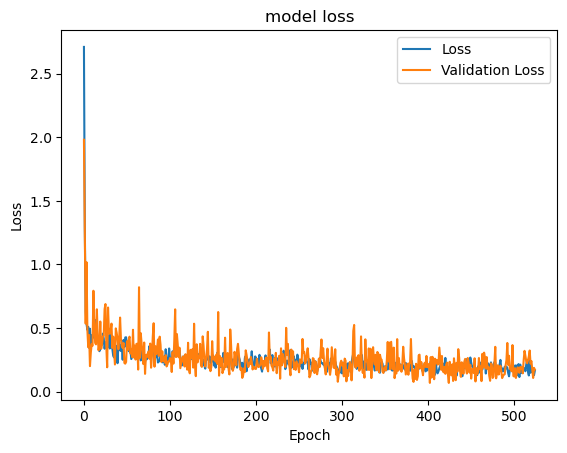

<Figure size 640x480 with 0 Axes>

In [38]:
import matplotlib.pyplot as plt
# plt.plot(hist.history["acc"])
# plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Loss","Validation Loss"])
plt.show()
plt.savefig('chart loss.png')

1/1 [==============================] - 0s 20ms/step
plane


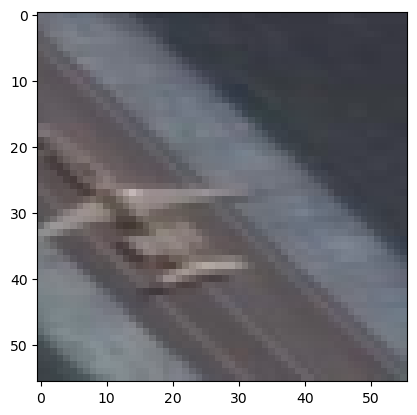

In [46]:
im = X_test[200]
plt.imshow(im)
img = np.expand_dims(im, axis=0)
out= model_final.predict(img)
if out[0][0] > out[0][1]:
    print("not plane")
else:
    print("plane")

1/1 [==============================] - 0s 19ms/step


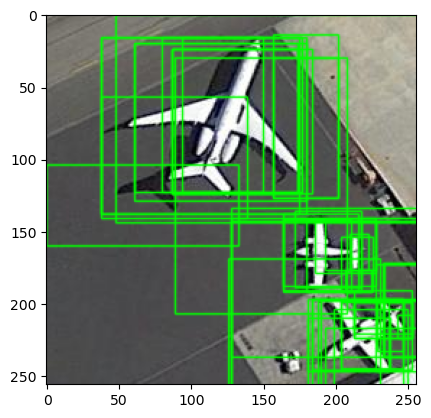

In [42]:
z = 0

for e, i in enumerate(os.listdir(path)):
    if i.startswith("airplane_007"):
        z += 1
        img = cv2.imread(os.path.join(path, i))
        ss.setBaseImage(img)
        ss.switchToSelectiveSearchFast()
        ssresults = ss.process()
        imout = img.copy()

        for e, result in enumerate(ssresults):
            if e < 2000:
                x, y, w, h = result
                timage = imout[y:y+h, x:x+w]
                resized = cv2.resize(timage, (56, 56), interpolation=cv2.INTER_AREA)  # Resize to (56, 56)
                img = np.expand_dims(resized, axis=0)
                
                # Ensure input shape matches the model's expected input shape
                out = model_final.predict(img)
                
                if out[0][0] > 0.65:
                    cv2.rectangle(imout, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)

        plt.figure()
        plt.imshow(cv2.cvtColor(imout, cv2.COLOR_BGR2RGB))
        plt.show()